In [45]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

In [46]:
df = pd.read_csv("./data/exchange.csv")
df.head(10)


,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SPFB.RTS-12.18,1,03/09/18,10:01,107900.0,108060.0,107900.0,108030.0,3
1,SPFB.RTS-12.18,1,03/09/18,10:02,107960.0,107960.0,107960.0,107960.0,5
2,SPFB.RTS-12.18,1,03/09/18,10:04,108000.0,108000.0,108000.0,108000.0,8
3,SPFB.RTS-12.18,1,03/09/18,10:05,108000.0,108000.0,108000.0,108000.0,1
4,SPFB.RTS-12.18,1,03/09/18,10:08,108080.0,108080.0,108080.0,108080.0,1
5,SPFB.RTS-12.18,1,03/09/18,10:09,108200.0,108250.0,108200.0,108250.0,15
6,SPFB.RTS-12.18,1,03/09/18,10:11,108250.0,108250.0,108250.0,108250.0,2
7,SPFB.RTS-12.18,1,03/09/18,10:12,108250.0,108250.0,108250.0,108250.0,8
8,SPFB.RTS-12.18,1,03/09/18,10:14,108200.0,108200.0,108200.0,108200.0,3
9,SPFB.RTS-12.18,1,03/09/18,10:15,108290.0,108290.0,108290.0,108290.0,1


In [47]:
df["DATETIME"] = df["<DATE>"].astype(str) + " " + df["<TIME>"].astype(str)
df["DATETIME"] = pd.to_datetime(df["DATETIME"], format="%d/%m/%y %H:%M")
df = df.set_index("DATETIME")
df = df.drop(columns=['<DATE>', '<TIME>'])
df = df.sort_index(ascending=True)

df.head()

,<TICKER>,<PER>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
DATETIME,,,,,,,
2018-09-03 10:01:00,SPFB.RTS-12.18,1,107900.0,108060.0,107900.0,108030.0,3
2018-09-03 10:02:00,SPFB.RTS-12.18,1,107960.0,107960.0,107960.0,107960.0,5
2018-09-03 10:04:00,SPFB.RTS-12.18,1,108000.0,108000.0,108000.0,108000.0,8
2018-09-03 10:05:00,SPFB.RTS-12.18,1,108000.0,108000.0,108000.0,108000.0,1
2018-09-03 10:08:00,SPFB.RTS-12.18,1,108080.0,108080.0,108080.0,108080.0,1


In [49]:
hourly_data = df.resample('1h').agg({
    '<OPEN>': 'first',
    '<HIGH>': 'max',
    '<LOW>': 'min',
    '<CLOSE>': 'last',
}).dropna()
hourly_data

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
DATETIME,,,,
2018-09-03 10:00:00,107900.0,108290.0,107720.0,108050.0
2018-09-03 11:00:00,108030.0,108250.0,107650.0,107650.0
2018-09-03 12:00:00,107680.0,107770.0,107450.0,107510.0
2018-09-03 13:00:00,107500.0,107640.0,107370.0,107590.0
2018-09-03 14:00:00,107770.0,107770.0,107480.0,107530.0
...,...,...,...,...
2018-12-20 14:00:00,109160.0,109500.0,109060.0,109410.0
2018-12-20 15:00:00,109410.0,109650.0,109310.0,109400.0
2018-12-20 16:00:00,109400.0,109400.0,109380.0,109380.0


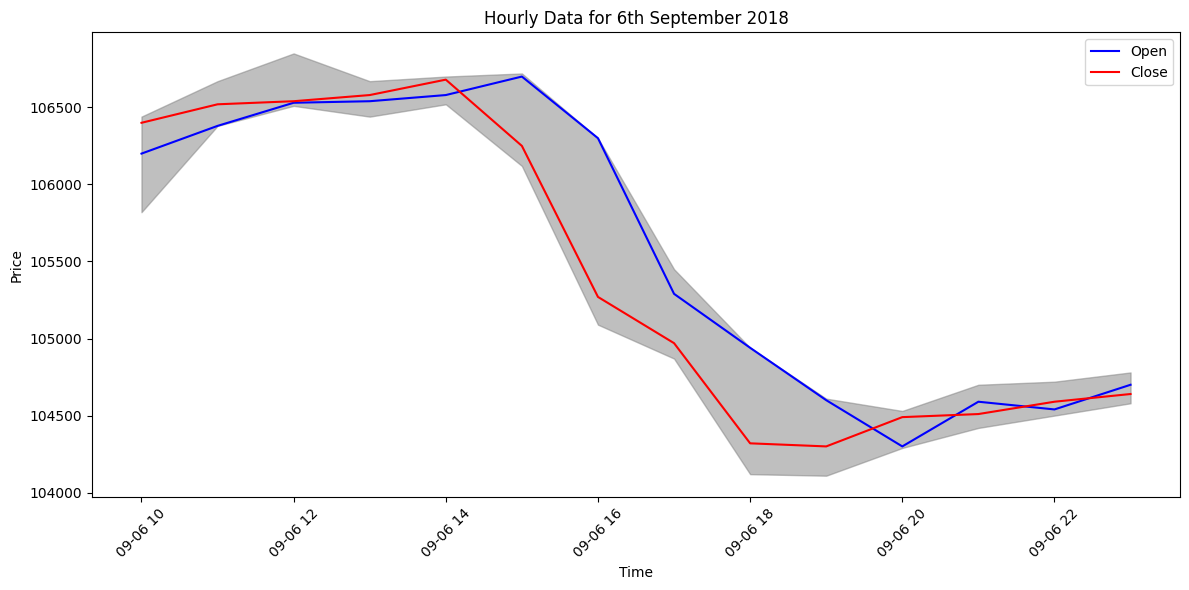

In [ ]:
hourly_data = hourly_data.loc['2018-09-06']
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(hourly_data.index, hourly_data['<OPEN>'], label='Open', color='blue')
ax.plot(hourly_data.index, hourly_data['<CLOSE>'], label='Close', color='red')
ax.fill_between(hourly_data.index, hourly_data['<LOW>'], hourly_data['<HIGH>'], color='gray', alpha=0.5)
ax.set_title('Hourly Data for 6th September 2018')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()